In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
frm = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
print(frm.info())
# Display the data table for preview


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB
None


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [5]:

study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [6]:
# Checking the number of mice.
print(f"Unique IDs: {frm['Mouse ID'].unique().size}")
print(f"All IDs: {frm['Mouse ID'].size}")

Unique IDs: 249
All IDs: 1893


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
frm1 = frm[frm['Mouse ID'].duplicated()]
frm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 137 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1644 non-null   object 
 1   Timepoint           1644 non-null   int64  
 2   Tumor Volume (mm3)  1644 non-null   float64
 3   Metastatic Sites    1644 non-null   int64  
 4   Drug Regimen        1644 non-null   object 
 5   Sex                 1644 non-null   object 
 6   Age_months          1644 non-null   int64  
 7   Weight (g)          1644 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 115.6+ KB


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
frm2 = frm1.drop_duplicates('Mouse ID')
frm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 137 to 487
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            237 non-null    object 
 1   Timepoint           237 non-null    int64  
 2   Tumor Volume (mm3)  237 non-null    float64
 3   Metastatic Sites    237 non-null    int64  
 4   Drug Regimen        237 non-null    object 
 5   Sex                 237 non-null    object 
 6   Age_months          237 non-null    int64  
 7   Weight (g)          237 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 16.7+ KB


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
frm2 = pd.DataFrame(frm2)
frm2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21
...,...,...,...,...,...,...,...,...
483,s121,5,45.635662,1,Infubinol,Male,23,26
484,z581,5,49.273092,1,Infubinol,Female,24,25
485,f278,5,48.194578,0,Ketapril,Male,12,30
486,j235,5,46.588820,0,Placebo,Male,6,30


In [10]:
# Checking the number of mice in the clean DataFrame.
print(f"Unique IDs: {frm2['Mouse ID'].unique().size}")
print(f"All IDs: {frm2['Mouse ID'].size}")

Unique IDs: 237
All IDs: 237


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

frm2.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': st.describe})


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"(25, (38.79647373, 45.8956472), 44.2660864152,..."
Ceftamin,"(21, (45.54607595, 48.00919049), 46.5030509585..."
Infubinol,"(25, (36.3213458, 49.27309187), 46.5412467376,..."
Ketapril,"(23, (45.69418805, 49.47041702), 47.3891745208..."
Naftisol,"(23, (45.6569785, 49.33299873), 46.79609809739..."
Placebo,"(24, (45.69112405, 48.93701188), 47.1255891883..."
Propriva,"(24, (45.0, 49.48194935), 47.07779092791667, 1..."
Ramicane,"(25, (38.71187185, 45.87754494), 43.9448593996..."
Stelasyn,"(23, (45.75172728, 49.3426301), 47.47083036130..."


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line of code
frm2.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg({np.mean, np.median, np.var, np.std})

,mean,median,var,std
Drug Regimen,,,,
Capomulin,44.266086,45.597064,5.030889,2.242964
Ceftamin,46.503051,46.370798,0.568299,0.753856
Infubinol,46.541247,46.870483,5.689821,2.385335
Ketapril,47.389175,47.059664,1.612964,1.270025
Naftisol,46.796098,46.621301,0.942076,0.970606
Placebo,47.125589,46.989764,1.141526,1.068422
Propriva,47.077791,46.847642,1.482589,1.217616
Ramicane,43.944859,45.521875,5.831150,2.414777
Stelasyn,47.470830,47.054185,1.493585,1.222123


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#bar plot timepoints for total number mice tested for each regimen using pandas


frm2.describe()
frm2.groupby("Drug Regimen").size()

Drug Regimen
Capomulin    25
Ceftamin     21
Infubinol    25
Ketapril     23
Naftisol     23
Placebo      24
Propriva     24
Ramicane     25
Stelasyn     23
Zoniferol    24
dtype: int64

In [14]:
bar = frm2["Drug Regimen"].value_counts().reset_index()
bar.columns = ["Drug", "Count"]
bar

,Drug,Count
0,Capomulin,25
1,Ramicane,25
2,Infubinol,25
3,Propriva,24
4,Zoniferol,24
5,Placebo,24
6,Naftisol,23
7,Stelasyn,23
8,Ketapril,23
9,Ceftamin,21


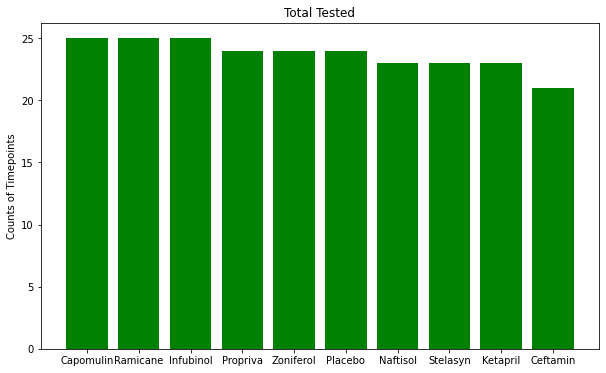

In [15]:
plt.figure(figsize=(10,6))
plt.bar(bar.Drug, bar.Count,color="green")
plt.title("Total Tested")
plt.ylabel("Counts of Timepoints")
plt.show()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


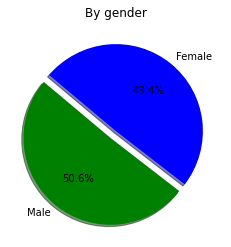

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
bar1 = frm2["Sex"].value_counts().reset_index()
bar1.columns = ["Gender", "Count"]
bar


pc = bar1.Gender
count = bar1["Count"]
colors = ["green","blue"]
explode = (0.1,0)

#Give pie chart data needed
plt.pie(count, explode=explode, labels=pc, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("By gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
frm2.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21


In [28]:
#Create the timepoint dataframe
greatest = frm2.groupby("Mouse ID").Timepoint.max().reset_index()
greatest

,Mouse ID,Timepoint
0,a203,5
1,a251,5
2,a262,5
3,a275,5
4,a366,5
...,...,...
232,z435,5
233,z578,5
234,z581,5
235,z795,5


In [30]:
#Create the new table from the previous groupby dataframe and include mouse id and times
frm3 = pd.merge(frm2, greatest, on=["Mouse ID", "Timepoint"], how="inner")
frm3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,45.000000,0,Propriva,Female,21,26
1,a275,5,46.795257,0,Ceftamin,Female,20,28
2,w575,5,48.913860,1,Zoniferol,Female,16,28
3,x822,5,45.671104,1,Ceftamin,Male,3,29
4,l509,5,45.851193,0,Capomulin,Male,17,21
...,...,...,...,...,...,...,...,...
232,s121,5,45.635662,1,Infubinol,Male,23,26
233,z581,5,49.273092,1,Infubinol,Female,24,25
234,f278,5,48.194578,0,Ketapril,Male,12,30
235,j235,5,46.588820,0,Placebo,Male,6,30


In [31]:
#Create the breakdown of the listed drugs
mask = frm3["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
frm4 = frm3[mask].reset_index(drop=True)

frm4

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,5,46.795257,0,Ceftamin,Female,20,28
1,x822,5,45.671104,1,Ceftamin,Male,3,29
2,l509,5,45.851193,0,Capomulin,Male,17,21
3,l897,5,45.462243,0,Capomulin,Male,17,19
4,l558,5,45.809089,0,Ceftamin,Female,13,30
...,...,...,...,...,...,...,...,...
91,o809,5,46.877243,0,Infubinol,Male,3,25
92,i386,5,46.853697,1,Infubinol,Female,23,29
93,s121,5,45.635662,1,Infubinol,Male,23,26
94,z581,5,49.273092,1,Infubinol,Female,24,25


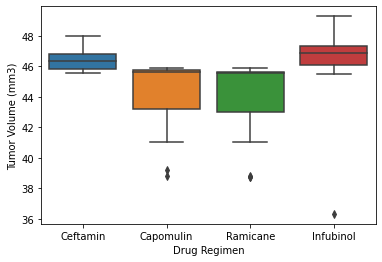

In [32]:
#Create the boxplot
sns.boxplot(data=frm4, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()

In [19]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Not sure why my line isnt showing

# mice = frm2.loc[frm2["Drug Regimen"] == "Capomulin"]

# plt.figure(figsize=(10,6))

# plt.plot(mice.Timepoint, mice["Tumor Volume (mm3)"], marker="o")
# plt.title("tumor volume vs. time point")
# plt.ylabel("Tumor Volume(mm3)")
# plt.xlabel("Weight (g)")
# plt.show()
cap_data = frm1.loc[frm1['Drug Regimen'] == 'Capomulin']

cap_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
253,l509,5,45.851193,0,Capomulin,Male,17,21
256,l897,5,45.462243,0,Capomulin,Male,17,19
288,w150,5,39.202129,0,Capomulin,Male,23,23
300,s710,5,43.180977,0,Capomulin,Female,1,23
309,w914,5,45.893720,0,Capomulin,Male,24,21


In [50]:
# cap_time = cap_data.groupby(['Timepoint']).agg()
# tumor_mean=('Tumor Volume (mm3)', np.mean).round(3)

# cap_time.head(10)

cap_time = cap_data.groupby(['Timepoint']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# View the groupby dataframe 
cap_time.head()









,Tumor_Mean,Tumor_SEM
Timepoint,,
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910
25,39.940,0.882


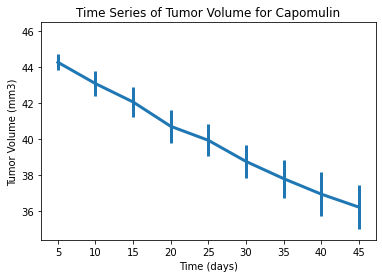

<Figure size 720x432 with 0 Axes>

In [51]:
times = list(cap_time.index.values)

plt.errorbar(
    times, 
    cap_time['Tumor_Mean'],
    yerr=cap_time['Tumor_SEM'],
    label="Time Series of Tumor Volume for Capomulin", 
    linewidth=3
    )

plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(min(times)-max(times)*0.05, max(times)*1.05)
plt.ylim(min(cap_time["Tumor_Mean"])*0.95, max(cap_time['Tumor_Mean'])*1.05)
plt.figure(figsize=(10,6))

plt.show()

In [22]:
# mice = frm2.loc[frm2["Mouse ID"] == "b742"]

# plt.figure(figsize=(10,6))

# plt.plot(mice.Timepoint, mice["Tumor Volume (mm3)"])
# plt.title("tumor volume vs. time point")
# plt.ylabel("Tumor Volume(mm3)")
# plt.xlabel("Weight (g)")
# plt.show()


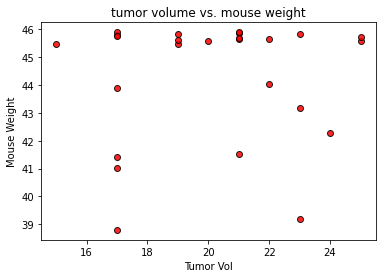

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
sct = frm2.loc[frm2["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
sct.head()

plt.scatter(sct["Weight (g)"], sct["Tumor Volume (mm3)"], facecolors="red", edgecolors="black", alpha=0.85)
plt.title("tumor volume vs. mouse weight")
plt.xlabel("Tumor Vol")
plt.ylabel("Mouse Weight")
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
sct.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.062567
Tumor Volume (mm3),0.062567,1.000000


In [25]:
#stats models